In [1]:
import time as T
import pickle
from utils import AssignProbSent

# Visualisation

In [2]:
import matplotlib.pyplot as plt

In [3]:
s1=['“', 'i', 'told', 'her', 'to', 'remain', 'in', 'the', 'tent', '.']
s2=['“', 'no', ',', 'you', 'can', 'stay', 'where', 'you', 'are', ',', 'harry', 'dear', ',', 'you', '’', 've', 'had', 'a', 'long', 'journey', '—', '”', '“', 'what', 'can', 'i', 'do', ',', 'molly', '?', '”', 'said', 'tonks', 'enthusiastically', ',', 'bounding', 'forward', '.']

In [4]:
filename = 'TrieRoot'
infile = open(filename, 'rb')
root = pickle.load(infile)
infile.close()

In [5]:
from utils import plot_minimal_pair

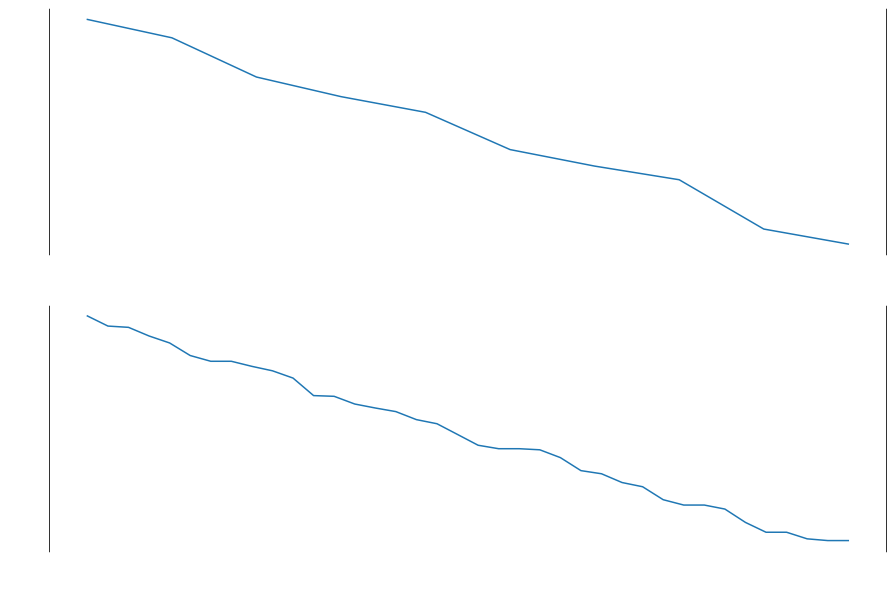

===============	===============	===============	===============	===============	===============	

This is a plot illustrating how the probability of the test sentence: 

 ['“', 'i', 'told', 'her', 'to', 'remain', 'in', 'the', 'tent', '.']

and its miminal pair: 

['“', 'no', ',', 'you', 'can', 'stay', 'where', 'you', 'are', ',', 'harry', 'dear', ',', 'you', '’', 've', 'had', 'a', 'long', 'journey', '—', '”', '“', 'what', 'can', 'i', 'do', ',', 'molly', '?', '”', 'said', 'tonks', 'enthusiastically', ',', 'bounding', 'forward', '.'] 

declines as the the algorithm process each word


In [6]:
plot_minimal_pair(s1,s2,root, AssignProbSent)

In [7]:
def hhh(f):
    assert type(f) == int, 'fuck'

In [8]:
def hhh(f):
    assert type(f) == int, 'fuck'

In [9]:
hhh('f')

AssertionError: fuck

In [ ]:

T_START = T.time()
T_END = T.time()
T_END - T_START

In [ ]:
import numpy as np

In [ ]:
class TrieNode():  
    def __init__(self, word):
        try:
            self.Element = word
            self.Count = 0
            self.Children = []
            self.Parent = 'Root'
        except (AttributeError, TypeError):
          raise AssertionError('Input variables should be a string')
        return
  
    def __repr__(self):
        return f"TrieNode({self.Element}, Count = {self.Count}, Parent: {self.Parent.Element})"

    def __str__(self):
        return f'TrieNode ({self.Element}, Count = {self.Count})\n with children {self.Children}'


    def Update(self):
        self.Count+=1
        return
        
    def AddChild(self, Child):
        try:
            if len(Child.Children)>0:
                print('This child has got children, could not add to trie')
                return
            
            if Child.Element in [each.Element for each in self.Children]:
                for i, _ in enumerate(self.Children):
                    if _.Element == Child.Element:
                        self.Children[i].Update()
                        break
            else:    
#                 Specify relationship
                Child.Parent = self
                self.Children.append(Child)
                Child.Update()
                return
            
        except (AttributeError, TypeError):
          raise AssertionError('Input variables should be a TrieNode')  
 
# must be run after construction of trie
    def AdjustCount(self):
#     adjust 1st tier
        for child in self.Children:
            if len(child.Children)>0:
                for nextChild in child.Children:
                    if len(nextChild.Children)>0:
                        Count = 0
                        for each in nextChild.Children:
                            Count+=each.Count
                        nextChild.Count = Count
        
        #     adjust 3rd last tier
        for child in self.Children:
            if len(child.Children)>0:
                Count = 0
                for nextChild in child.Children:
                    Count+=nextChild.Count
                child.Count = Count
        #     adjust Root tier
        Cnt = 0
        for child in self.Children:
            Cnt += child.Count
        child.Parent.Count = Cnt
                
        return
        
    def InTrie(self, foo):
        try:
            for i in range(len(foo)):

    #             get the set
                for index, _ in enumerate(self.Children):
                    ChildrenSet = set([_.Element for _ in self.Children])
                    if foo[i] not in ChildrenSet:
                        print(f'This word {foo[i]}  ({i}th)is not in Trie')
                        return False
#                     print(f'Now searching the node {_} with element {_.Element}')
                    if _.Element == foo[i]:
                        self = self.Children[index]        
                        print(f'This word {foo[i]}  ({i}th)is in Trie')
                        break

    #             print(f'Its path is:{} ')
            print(f'self count is {self.Count} and Parent count is {self.Parent.Count}')
            return self.Count/self.Parent.Count

        except (AttributeError, TypeError):
            raise AssertionError('Input variables should be a list of str')

    def Smoothing(self):

        def FindOneTimeTrigrams(self):
            num = 0
            for child in self.Children:
                if len(child.Children)>0:
                    for NextChild in child.Children:
                        if len(NextChild.Children)>0:
                            for LastChild in NextChild.Children:
                                num+=(LastChild.Count ==1)          
            return num

        def FindOneTimeBigrams(self):
            num = 0
            for child in self.Children:
                if len(child.Children)>0:
                    for NextChild in child.Children:
                        num+=(NextChild.Count==1)
            return num

        def FindOneTimeUnigrams(self):
            num = 0
            for child in self.Children:
                num+=(child.Count==1)
            return num

        #     Good Turing smoothing tri
        vocab_size = len(self.Children)
        tri1 = FindOneTimeTrigrams(self)
        tri0 = vocab_size**3
        TrigramUnkCount = tri1/tri0
    #     Good Turing smoothing bi
        bi1 = FindOneTimeBigrams(self)
        bi0 = vocab_size**2
        BigramUnkCount = bi1/bi0
    #     Good Turing smoothing uni
        Uni1 = FindOneTimeUnigrams(self)
        Uni0 = vocab_size+1
        UnigramUnkCount = Uni1/Uni0

        return UnigramUnkCount, BigramUnkCount,TrigramUnkCount

In [ ]:
def Smoothing(ngramTrie):

    def FindOneTimeTrigrams(ngramTrie):
        num = 0
        for child in ngramTrie.Children:
            if len(child.Children)>0:
                for NextChild in child.Children:
                    if len(NextChild.Children)>0:
                        for LastChild in NextChild.Children:
                            num+=(LastChild.Count ==1)          
        return num
                                
    def FindOneTimeBigrams(ngramTrie):
        num = 0
        for child in ngramTrie.Children:
            if len(child.Children)>0:
                for NextChild in child.Children:
                    num+=(NextChild.Count==1)
        return num
    
    def FindOneTimeUnigrams(ngramTrie):
        num = 0
        for child in ngramTrie.Children:
            num+=(child.Count==1)
        return num

    #     Good Turing smoothing tri
    vocab_size = len(ngramTrie.Children)
    tri1 = FindOneTimeTrigrams(ngramTrie)
    tri0 = vocab_size**3
    TrigramUnkCount = tri1/tri0
#     Good Turing smoothing bi
    bi1 = FindOneTimeBigrams(ngramTrie)
    bi0 = vocab_size**2
    BigramUnkCount = bi1/bi0
#     Good Turing smoothing uni
    Uni1 = FindOneTimeUnigrams(ngramTrie)
    Uni0 = vocab_size+1
    UnigramUnkCount = Uni1/Uni0
    
    return UnigramUnkCount, BigramUnkCount,TrigramUnkCount

## Test set

In [ ]:
Root = TrieNode('root')
print(Root)

In [ ]:
x = TrieNode('is')
x1 = TrieNode('fuck')
y = TrieNode('in')
y1 = TrieNode('ff')
z = TrieNode('trie')
z1 =TrieNode('fg')

In [ ]:
Root.AddChild(x)
Root.AddChild(x1)
x.AddChild(y)
x.AddChild(y1)
y.AddChild(z)
# y.AddChild(z1)

In [ ]:
s = ['is','in']

In [ ]:
print(Root.Count)
Root.Smoothing()

In [ ]:
Root.AdjustCount()

In [ ]:
print('adjusted: ',Root.Count)
node=Root.InTrie(s)
print('\nThe end node is:', node)
print(Root)
Root.Smoothing()

In [ ]:
print(Smoothing(Root))


In [ ]:
import pickle
filename = 'TrieRoot'
infile = open(filename,'rb')
Root = pickle.load(infile)
infile.close()


In [ ]:
Smoothing(Root)

In [ ]:
def Assign_probability_bigram(utterance, trie, unk):
    if type(utterance) != list:
        print(utterance)
    padded = ['<s>']*2 + utterance + ['</s>']
    log_prob_array = []
#sliding through each word
    for i in range(len(padded) - 3):
        trigram = padded[i : i + 3]  
        if trie.InTrie(trigram):
            log_prob = np.log(trie.InTrie(trigram))
        else:
            log_prob = unk
            
        if i == 0:
            log_prob_array.append(log_prob)
        else:
            prev_log_prob = log_prob_array[-1]
            log_prob_array.append(log_prob+prev_log_prob)
            
    return log_prob_array



In [ ]:
unk =-16

In [ ]:
Assign_probability_bigram(s, Root, unk)